In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('../.')
import datasets

In [2]:
sample_size = 200
feature_dimension = 50
# Sample wise double descent for linear model only affected by input Dimension, even if some of input is disturbance (useless) term
used_feature = feature_dimension
noise_level = 0
bias = 10
y_dimension = 5
test_size = 0.5
# set a random seed (int) if you want to the datasets to be fixed
RAND_ST = None

X, y = datasets.linear_regression_with_gaussian(sample_size=sample_size, feautre_size=feature_dimension, used_feature=used_feature, noise_level=noise_level, bias=bias, y_dimension=y_dimension, random_state=RAND_ST)

# X = np.column_stack((X, X*5))

# X = np.column_stack((np.ones(sample_size), X))

Noiseless Data

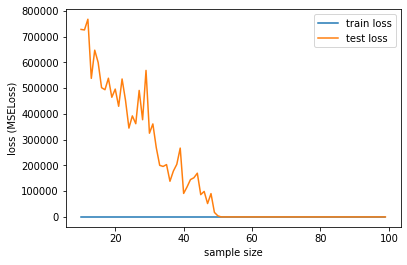

In [3]:
train_losses = []
test_losses = []

samples = [sample for sample in range(10, int(sample_size/2), 1)]

for sample in samples:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=RAND_ST, shuffle=True)
    model = LinearRegression().fit(X_train[:sample], y_train[:sample])
    
    train_losses.append(np.sum(np.power(model.predict(X_train[:sample])-y_train[:sample], 2)) / sample)
    test_losses.append(np.sum(np.power(model.predict(X_test)-y_test, 2)) / X_test.shape[0])
    
    # print(np.sum(np.power(model.predict(X_train[:sample])-y_train[:sample], 2)) / sample)
    # print(np.sum(np.power(model.predict(X_test) - y_test, 2)) / X_test.shape[0])
    # print(sample)
    # print()

# lowestIndex = np.argsort(test_losses)

plt.xlabel("sample size")
plt.ylabel("loss (MSELoss)")
plt.plot(samples, train_losses, label = "train loss")
plt.plot(samples, test_losses, label = "test loss")
plt.legend()
plt.show()

Noisy Data

In [4]:
X = X + np.random.normal(0, 0.1, (sample_size, X.shape[1]))

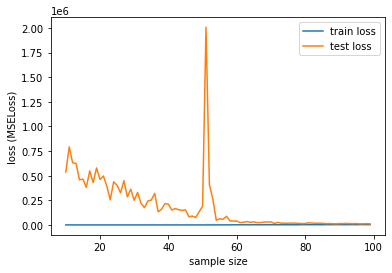

In [5]:
train_losses = []
test_losses = []

samples = [sample for sample in range(10, int(sample_size/2), 1)]

for sample in samples:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=RAND_ST, shuffle=True)
    model = LinearRegression().fit(X_train[:sample], y_train[:sample])
    
    train_losses.append(np.sum(np.power(model.predict(X_train[:sample])-y_train[:sample], 2)) / sample)
    test_losses.append(np.sum(np.power(model.predict(X_test)-y_test, 2)) / X_test.shape[0])
    
    # print(np.sum(np.power(model.predict(X_train[:sample])-y_train[:sample], 2)) / sample)
    # print(np.sum(np.power(model.predict(X_test) - y_test, 2)) / X_test.shape[0])
    # print(sample)
    # print()

# lowestIndex = np.argsort(test_losses)

plt.xlabel("sample size")
plt.ylabel("loss (MSELoss)")
plt.plot(samples, train_losses, label = "train loss")
plt.plot(samples, test_losses, label = "test loss")
plt.legend()
plt.show()

Real World Datasets

In [6]:
X, y = datasets.load_boston()
print(X.shape)

(506, 13)


c:\Users\Huiji\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

(506, 13)


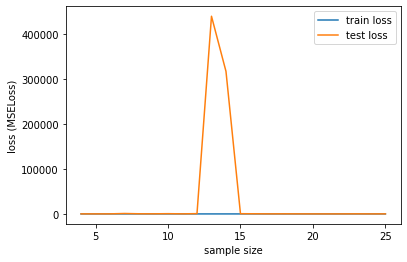

: 

In [7]:
train_losses = []
test_losses = []

samples = [sample for sample in range(4, X.shape[1]*2, 1)]

print(X.shape)

for sample in samples:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=RAND_ST, shuffle=True)
    model = LinearRegression().fit(X_train[:sample], y_train[:sample])
    
    train_losses.append(np.sum(np.power(model.predict(X_train[:sample])-y_train[:sample], 2)) / sample)
    test_losses.append(np.sum(np.power(model.predict(X_test)-y_test, 2)) / X_test.shape[0])
    
    # print(np.sum(np.power(model.predict(X_train[:sample])-y_train[:sample], 2)) / sample)
    # print(np.sum(np.power(model.predict(X_test) - y_test, 2)) / X_test.shape[0])
    # print(sample)
    # print()

# lowestIndex = np.argsort(test_losses)

plt.xlabel("sample size")
plt.ylabel("loss (MSELoss)")
plt.plot(samples, train_losses, label = "train loss")
plt.plot(samples, test_losses, label = "test loss")
plt.legend()
plt.show()